In [1]:
# Import libraries
from pathlib import Path
import pandas as pd
import glob

# Get the files from the path provided
az_files = glob.glob('AZ/*.csv')
ca_files = glob.glob('CA/*.csv')
co_files = glob.glob('CO/*.csv')
id_files = glob.glob('ID/*.csv')
mt_files = glob.glob('MT/*.csv')
nm_files = glob.glob('NM/*.csv')
nv_files = glob.glob('NV/*.csv')
or_files = glob.glob('OR/*.csv')
ut_files = glob.glob('UT/*.csv')
wa_files = glob.glob('WA/*.csv')
wy_files = glob.glob('WY/*.csv')

fire_files = glob.glob('fire_data/*.csv')

In [2]:
# Read each CSV file into DataFrame
az_all = (pd.read_csv(file) for file in az_files)
ca_all = (pd.read_csv(file) for file in ca_files)
co_all = (pd.read_csv(file) for file in co_files)
id_all = (pd.read_csv(file) for file in id_files)
mt_all = (pd.read_csv(file) for file in mt_files)
nm_all = (pd.read_csv(file) for file in nm_files)
nv_all = (pd.read_csv(file) for file in nv_files)
or_all = (pd.read_csv(file) for file in or_files)
ut_all = (pd.read_csv(file) for file in ut_files)
wa_all = (pd.read_csv(file) for file in wa_files)
wy_all = (pd.read_csv(file) for file in wy_files)

fire_all = (pd.read_csv(file) for file in fire_files)

In [3]:
# Concatenate all DataFrames
AZ = pd.concat(az_all, ignore_index=True)
CA = pd.concat(ca_all, ignore_index=True)
CO = pd.concat(co_all, ignore_index=True)
ID = pd.concat(id_all, ignore_index=True)
MT = pd.concat(mt_all, ignore_index=True)
NM = pd.concat(nm_all, ignore_index=True)
NV = pd.concat(nv_all, ignore_index=True)
OR = pd.concat(or_all, ignore_index=True)
UT = pd.concat(ut_all, ignore_index=True)
WA = pd.concat(wa_all, ignore_index=True)
WY = pd.concat(wy_all, ignore_index=True)

fire = pd.concat(fire_all, ignore_index=True)

print(type(AZ))

<class 'pandas.core.frame.DataFrame'>


In [4]:
AZ.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/13/2001,AQS,40018001,1,0.8,ug/m3 LC,3,Mount Baldy,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,NaN,NaN,4,Arizona,1,Apache,34.058475,-109.441259
1,01/16/2001,AQS,40018001,1,1.7,ug/m3 LC,7,Mount Baldy,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,NaN,NaN,4,Arizona,1,Apache,34.058475,-109.441259
2,02/21/2001,AQS,40018001,1,1.3,ug/m3 LC,5,Mount Baldy,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,NaN,NaN,4,Arizona,1,Apache,34.058475,-109.441259
3,02/24/2001,AQS,40018001,1,1.6,ug/m3 LC,7,Mount Baldy,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,NaN,NaN,4,Arizona,1,Apache,34.058475,-109.441259
4,02/27/2001,AQS,40018001,1,2.1,ug/m3 LC,9,Mount Baldy,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,NaN,NaN,4,Arizona,1,Apache,34.058475,-109.441259


In [5]:
print(fire.shape)
fire.head()

(2601659, 15)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,19.3378,-155.0360,311.6,1.0,1.0,2001-01-01,849,Terra,MODIS,83,6.2,296.9,9.8,N,2
1,19.3365,-155.0455,307.1,1.0,1.0,2001-01-01,849,Terra,MODIS,70,6.2,295.8,6.4,N,2
2,19.3351,-155.0549,315.4,1.0,1.0,2001-01-01,849,Terra,MODIS,91,6.2,292.2,13.0,N,2
3,19.3468,-155.0375,362.5,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,303.1,92.9,N,2
4,19.3454,-155.0469,368.2,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,309.3,110.3,N,2


In [10]:
# Data shape 
data_shape = pd.DataFrame(columns=['state', 'rows', 'columns'])

state_dfs = [AZ, CA, CO, ID, MT, NM, NV, OR, UT, WA, WY]
state_names = ['AZ', 'CA', 'CO', 'ID', 'MT', 'NM', 'NV', 'OR', 'UT', 'WA', 'WY']

for i, state in enumerate(state_dfs):
    new_row = pd.Series({'state': state_names[i], 'rows': state.shape[0], 'columns':state.shape[1]})
    data_shape = pd.concat([data_shape, new_row.to_frame().T], ignore_index=True)
    
data_shape

,state,rows,columns
0,AZ,136926,20
1,CA,821668,20
2,CO,112007,20
3,ID,137727,20
4,MT,145139,20
5,NM,124680,20
6,NV,45907,20
7,OR,142871,20
8,UT,166454,20
9,WA,277075,20


In [7]:
air_quality_west = pd.concat(state_dfs)

air_quality_west.tail()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
62396,12/13/2018,AQS,560399000,1,0.5,ug/m3 LC,2,NaN,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,27220.0,"Jackson, WY-ID",56,Wyoming,39,Teton,44.565217,-110.400996
62397,12/16/2018,AQS,560399000,1,0.5,ug/m3 LC,2,NaN,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,27220.0,"Jackson, WY-ID",56,Wyoming,39,Teton,44.565217,-110.400996
62398,12/19/2018,AQS,560399000,1,0.5,ug/m3 LC,2,NaN,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,27220.0,"Jackson, WY-ID",56,Wyoming,39,Teton,44.565217,-110.400996
62399,12/22/2018,AQS,560399000,1,0.6,ug/m3 LC,3,NaN,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,27220.0,"Jackson, WY-ID",56,Wyoming,39,Teton,44.565217,-110.400996
62400,12/25/2018,AQS,560399000,1,0.2,ug/m3 LC,1,NaN,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,27220.0,"Jackson, WY-ID",56,Wyoming,39,Teton,44.565217,-110.400996


In [11]:
new_row = pd.Series({'state': 'all', 'rows': air_quality_west.shape[0], 'columns':air_quality_west.shape[1]})
data_shape = pd.concat([data_shape, new_row.to_frame().T], ignore_index=True)

In [12]:
print(data_shape['rows'].iloc[0:11].sum())   
data_shape

2172855


,state,rows,columns
0,AZ,136926,20
1,CA,821668,20
2,CO,112007,20
3,ID,137727,20
4,MT,145139,20
5,NM,124680,20
6,NV,45907,20
7,OR,142871,20
8,UT,166454,20
9,WA,277075,20


In [13]:
## Geopandas tutorials
# https://jcutrer.com/python/learn-geopandas-plotting-usmaps
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
import matplotlib.pyplot as plt
import geopandas

#https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2022&layergroup=States+%28and+equivalent%29
states = geopandas.read_file('tl_2022_us_state.shp')
type(states)
states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


13    MULTIPOLYGON (((-119.99987 41.18397, -119.9998...
Name: geometry, dtype: geometry


,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049908397,2391592787,+44.3484222,-114.5588538,"POLYGON ((-116.35844 49.00047, -116.34805 49.0..."
12,4,8,35,00897535,35,NM,New Mexico,00,G4000,A,314198573403,726463825,+34.4346843,-106.1316181,"POLYGON ((-103.06472 32.33465, -103.06470 32.3..."
13,4,9,06,01779778,06,CA,California,00,G4000,A,403673617862,20291712025,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.99987 41.18397, -119.9998..."
16,4,9,41,01155107,41,OR,Oregon,00,G4000,A,248630319014,6169061220,+43.9717125,-120.6229578,"POLYGON ((-121.44123 45.69728, -121.42442 45.6..."
19,4,9,53,01779804,53,WA,Washington,00,G4000,A,172118861444,12548840784,+47.4073238,-120.5757999,"POLYGON ((-118.40382 46.00077, -118.40506 46.0..."


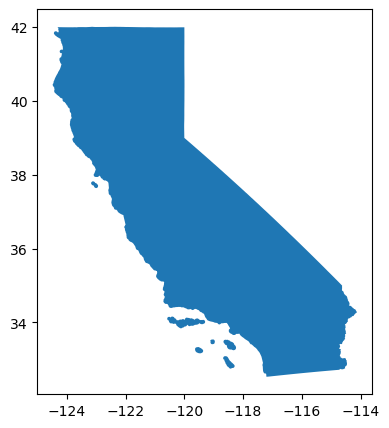

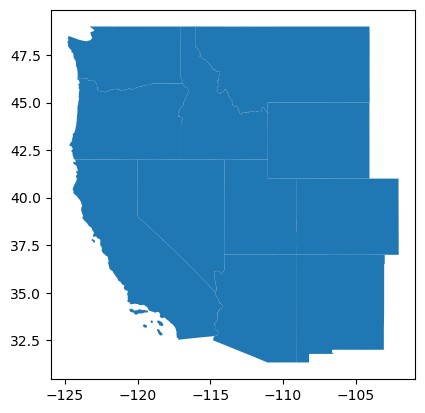

In [14]:
# example plot
states[states['NAME'] == 'California'].plot(figsize=(5, 5))

west = states[states['STUSPS'].isin(state_names)]
print(west[west['STUSPS'] == 'CA'].geometry)
west.plot()
west.head()

In [15]:
states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
## functions to input coordinates and output location

# To figure out state given coordinates
from shapely.geometry import Point

def is_point_in(df, long, lat, region):
    region = region
    p1 = Point(map(float, (long, lat)))
    return any(df['geometry'].contains(p1))

p1 = is_point_in(west, -117.6, 33.88, 'west')
print(f'I am in the west: {p1}')
   
def state_in(df, long, lat):
    p1 = Point(map(float, (long, lat)))
    return df['STUSPS'].loc[df['geometry'].contains(p1)].values[0]

print('Which state am I in?', state_in(west, -117.65, 33.8840))

I am in the west: True
Which state am I in? CA


In [21]:
# filter fires dataset for west

# start with rough filters guaranteed to cover it to reduce the data size
fire_filter = fire.loc[(fire['longitude'] > -125) & (fire['longitude'] < -100) & (fire['latitude'] > 30) & 
                (fire['latitude'] < 50)]
print(fire_filter.shape)

# Test on a filtered dataframe where the coordinates are known to be in california
ca_check = fire.loc[(fire['latitude'] > 38) & (fire['latitude'] < 41) & (fire['longitude'] > -124) & (fire['longitude'] < -120)]
print(ca_check.shape)

# check the functions on any point in the california slice dataframe
check = is_point_in(west, ca_check['longitude'].iloc[0], ca_check['latitude'].iloc[0], 'west')
check2 = state_in(west, ca_check['longitude'].iloc[0], ca_check['latitude'].iloc[0])

print('check', check, check2)

(960500, 15)
(119130, 15)
check True CA


In [20]:
# Add a column using the above functions to precisely determine if point is in west (True/False)
ca_check['is_west'] = ca_check.apply(lambda x: is_point_in(west, x['longitude'], x['latitude'], 'west'), axis = 1)
ca_check.head()

C:\Users\hanna\AppData\Local\Temp\ipykernel_58888\3416879251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_check['is_west'] = ca_check.apply(lambda x: is_point_in(west, x['longitude'], x['latitude'], 'west'), axis = 1)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,is_west
105,39.5914,-122.1571,300.7,1.2,1.1,2001-01-03,1903,Terra,MODIS,41,6.2,286.5,6.0,D,0,True
358,40.0888,-121.5852,300.9,1.7,1.3,2001-01-05,1850,Terra,MODIS,43,6.2,283.8,13.1,D,0,True
359,39.0318,-122.3353,302.0,1.8,1.3,2001-01-05,1850,Terra,MODIS,50,6.2,287.9,12.6,D,0,True
360,39.0299,-122.3138,311.2,1.8,1.3,2001-01-05,1850,Terra,MODIS,71,6.2,289.1,26.3,D,0,True
477,39.5729,-121.1653,304.4,1.4,1.2,2001-01-06,1933,Terra,MODIS,59,6.2,281.9,13.6,D,0,True


In [22]:
# Add a column using the above functions to precisely determine if point is in west (True/False)
fire_filter['is_west'] = fire_filter.apply(lambda x: is_point_in(west, x['longitude'], x['latitude'], 'west'), axis = 1)
fire_filter.head()

C:\Users\hanna\AppData\Local\Temp\ipykernel_58888\2543161017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_filter['is_west'] = fire_filter.apply(lambda x: is_point_in(west, x['longitude'], x['latitude'], 'west'), axis = 1)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,is_west
20,33.4115,-110.8618,304.1,2.6,1.5,2001-01-02,618,Terra,MODIS,59,6.2,267.2,45.3,N,2,True
21,36.7729,-118.8688,303.0,1.0,1.0,2001-01-02,619,Terra,MODIS,52,6.2,277.6,10.6,N,0,True
54,43.7961,-103.2496,320.8,1.1,1.1,2001-01-02,1818,Terra,MODIS,80,6.2,280.4,26.5,D,0,False
55,43.7937,-103.2358,316.6,1.1,1.1,2001-01-02,1818,Terra,MODIS,77,6.2,279.5,21.7,D,0,False
56,37.7012,-109.3073,312.8,1.0,1.0,2001-01-02,1820,Terra,MODIS,73,6.2,280.0,15.0,D,0,True


In [23]:
print(fire_filter.shape)
print(type(fire_filter['is_west'].iloc[0]))
print(fire_filter['is_west'].value_counts())

(960500, 16)
<class 'numpy.bool_'>
True     902376
False     58124
Name: is_west, dtype: int64


In [24]:
fire_west = fire_filter.loc[fire_filter.is_west]
print(fire_west.shape)
fire_west.head()

(902376, 16)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,is_west
20,33.4115,-110.8618,304.1,2.6,1.5,2001-01-02,618,Terra,MODIS,59,6.2,267.2,45.3,N,2,True
21,36.7729,-118.8688,303.0,1.0,1.0,2001-01-02,619,Terra,MODIS,52,6.2,277.6,10.6,N,0,True
56,37.7012,-109.3073,312.8,1.0,1.0,2001-01-02,1820,Terra,MODIS,73,6.2,280.0,15.0,D,0,True
57,32.8952,-105.6414,308.3,1.3,1.1,2001-01-02,1821,Terra,MODIS,67,6.2,274.1,18.0,D,0,True
58,33.4129,-110.8626,317.3,1.0,1.0,2001-01-02,1821,Terra,MODIS,77,6.2,290.6,15.8,D,2,True


In [25]:
air_quality_data = air_quality_west[['Date', 'STATE_CODE','SITE_LATITUDE','SITE_LONGITUDE','Daily Mean PM2.5 Concentration',
                                    'DAILY_AQI_VALUE','PERCENT_COMPLETE']]
fire_data = fire_west[['acq_date','acq_time','latitude','longitude','brightness','frp','daynight','confidence']]
fire_data['daynight_num'] = fire_west['daynight'].map({'N': 0, 'D': 1})

C:\Users\hanna\AppData\Local\Temp\ipykernel_58888\210301941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_data['daynight_num'] = fire_west['daynight'].map({'N': 0, 'D': 1})


In [26]:
fire_data.head()

,acq_date,acq_time,latitude,longitude,brightness,frp,daynight,confidence,daynight_num
20,2001-01-02,618,33.4115,-110.8618,304.1,45.3,N,59,0
21,2001-01-02,619,36.7729,-118.8688,303.0,10.6,N,52,0
56,2001-01-02,1820,37.7012,-109.3073,312.8,15.0,D,73,1
57,2001-01-02,1821,32.8952,-105.6414,308.3,18.0,D,67,1
58,2001-01-02,1821,33.4129,-110.8626,317.3,15.8,D,77,1


In [27]:
air_quality_data.head()

,Date,STATE_CODE,SITE_LATITUDE,SITE_LONGITUDE,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,PERCENT_COMPLETE
0,01/13/2001,4,34.058475,-109.441259,0.8,3,100.0
1,01/16/2001,4,34.058475,-109.441259,1.7,7,100.0
2,02/21/2001,4,34.058475,-109.441259,1.3,5,100.0
3,02/24/2001,4,34.058475,-109.441259,1.6,7,100.0
4,02/27/2001,4,34.058475,-109.441259,2.1,9,100.0
